In [1]:
from google.colab import files

uploaded = files.upload()

Saving archive.zip to archive.zip
Saving ethereum-historical-data.csv to ethereum-historical-data.csv
Saving solana-historical-data.csv to solana-historical-data.csv
Saving tether-historical-data.csv to tether-historical-data.csv


In [2]:
!unzip archive.zip -d extracted_folder

Archive:  archive.zip
  inflating: extracted_folder/btcusd_1-min_data.csv  


In [3]:
import pandas as pd

In [55]:
bitcoin = pd.read_csv('extracted_folder/btcusd_1-min_data.csv')
ethereum = pd.read_csv('ethereum-historical-data.csv')
solana = pd.read_csv('solana-historical-data.csv')
tether = pd.read_csv('tether-historical-data.csv')

Сначала разберёмся с биткоином. Необходимо сагрегировать данные, чтобы от поминутных перейти к посуточным значениям (чтобы все четыре датасета были одного вида). Руководствуемся такой логикой:

**Open**: оставляем самое первое значение за сутки

**Close**: берём последнее значение за сутки

**High**: max за сутки

**Low**: min за сутки

**Volume**: суммируем все поминутные значения (получим объём торгов за сутки)

Обработать пропуски, убрать дубликаты строк перед агрегацией.

In [56]:
bitcoin = bitcoin.sort_values("Timestamp")

In [57]:
bitcoin["Timestamp"] = pd.to_datetime(bitcoin["Timestamp"], unit="s")

# Добавляем колонку с датой (без времени)
bitcoin["Date"] = bitcoin["Timestamp"].dt.date

# Группируем по дате
bitcoin_daily = bitcoin.groupby("Date").agg({
    "Open": "first",     # первое значение за сутки
    "High": "max",       # максимум за сутки
    "Low": "min",        # минимум за сутки
    "Close": "last",     # последнее значение за сутки
    "Volume": "sum"      # сумма объёмов торгов за сутки
}).reset_index()

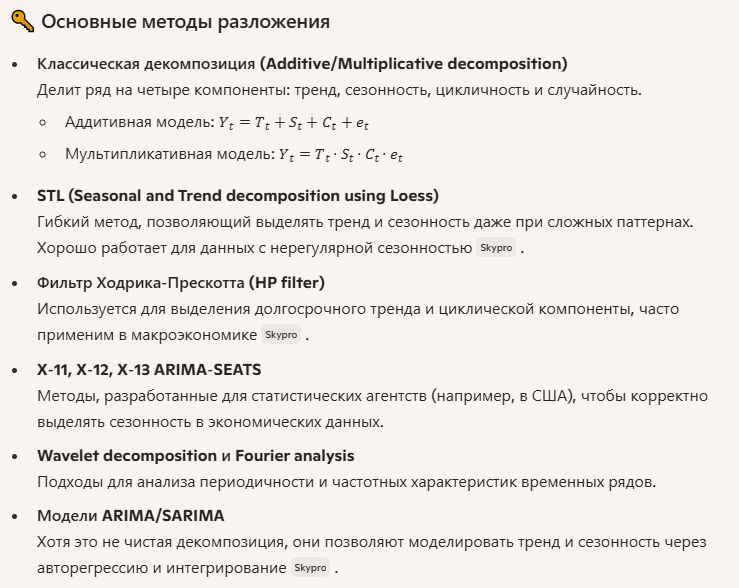

In [16]:
bitcoin_daily.head(24)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000
2012-01-02,4.84,5.00,4.84,5.00,10.100000
2012-01-03,5.00,5.32,5.00,5.29,107.085281
2012-01-04,5.29,5.57,4.93,5.57,107.233260
2012-01-05,5.57,6.46,5.57,6.42,70.328742
2012-01-06,6.42,6.90,6.40,6.40,55.855834
2012-01-07,6.40,6.80,6.00,6.80,2.795858
2012-01-08,6.80,6.90,6.80,6.90,4.000000
2012-01-09,6.90,7.00,6.36,6.48,64.869323


In [30]:
bitcoin_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5092 entries, 2012-01-01 to 2025-12-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5092 non-null   float64
 1   High    5092 non-null   float64
 2   Low     5092 non-null   float64
 3   Close   5092 non-null   float64
 4   Volume  5092 non-null   float64
dtypes: float64(5)
memory usage: 238.7 KB


In [58]:
bitcoin_daily = bitcoin_daily.set_index("Date")

In [59]:
bitcoin_daily.index = pd.to_datetime(bitcoin_daily.index)

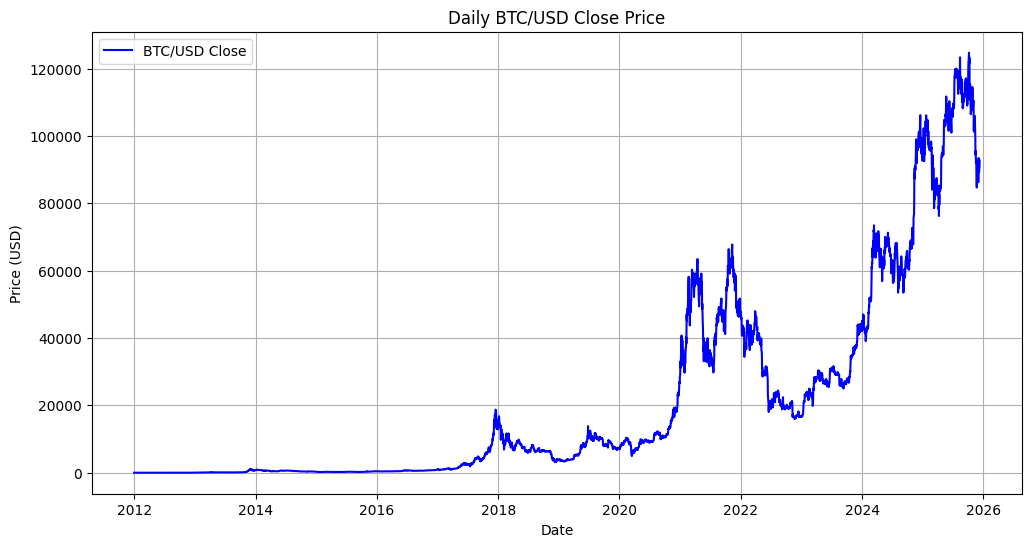

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Строим график
plt.plot(bitcoin_daily.index, bitcoin_daily["Close"], label="BTC/USD Close", color="blue")

# Добавляем оформление
plt.title("Daily BTC/USD Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

In [60]:
ethereum = ethereum.set_index("Дата")
ethereum.index = pd.to_datetime(ethereum.index)

In [61]:
solana = solana.set_index("Дата")
solana.index = pd.to_datetime(solana.index)

In [62]:
tether = tether.set_index("Дата")
tether.index = pd.to_datetime(tether.index)

In [ ]:
tether.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2025-06-09 to 2022-06-09
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Открытие         1097 non-null   object 
 1   Макс             1097 non-null   object 
 2   Мин              1097 non-null   object 
 3   Средняя          1097 non-null   object 
 4   Закрыть          1097 non-null   object 
 5   Изм.             1097 non-null   float64
 6   Объём            1097 non-null   object 
 7   Изм. Объема      1096 non-null   float64
 8   Капитализ.       1097 non-null   object 
 9   Изм. Капитализ.  1096 non-null   float64
dtypes: float64(3), object(7)
memory usage: 94.3+ KB


In [63]:
start_date = "2022-06-09"
end_date = "2025-06-09"

bitcoin_filtered = bitcoin_daily.loc[start_date:end_date]

print(bitcoin_filtered.head())
print(bitcoin_filtered.tail())

                Open      High       Low     Close        Volume
Date                                                            
2022-06-09  30117.01  30672.56  29920.56  29990.88    967.428486
2022-06-10  29975.75  30333.81  28832.83  28937.05   2512.622358
2022-06-11  28951.83  29403.62  28085.75  28571.03   1665.995847
2022-06-12  28571.75  28656.81  26868.19  27387.23   2182.012839
2022-06-13  27383.72  27506.62  22600.00  23144.08  11560.651179
                Open      High       Low     Close       Volume
Date                                                           
2025-06-05  104734.0  105959.0  100426.0  101559.0  1374.329509
2025-06-06  101558.0  105416.0  101159.0  104393.0  1474.941483
2025-06-07  104416.0  105959.0  103992.0  105619.0   613.871456
2025-06-08  105619.0  106507.0  105060.0  105792.0   353.130726
2025-06-09  105791.0  110587.0  105389.0  110307.0  1163.278776


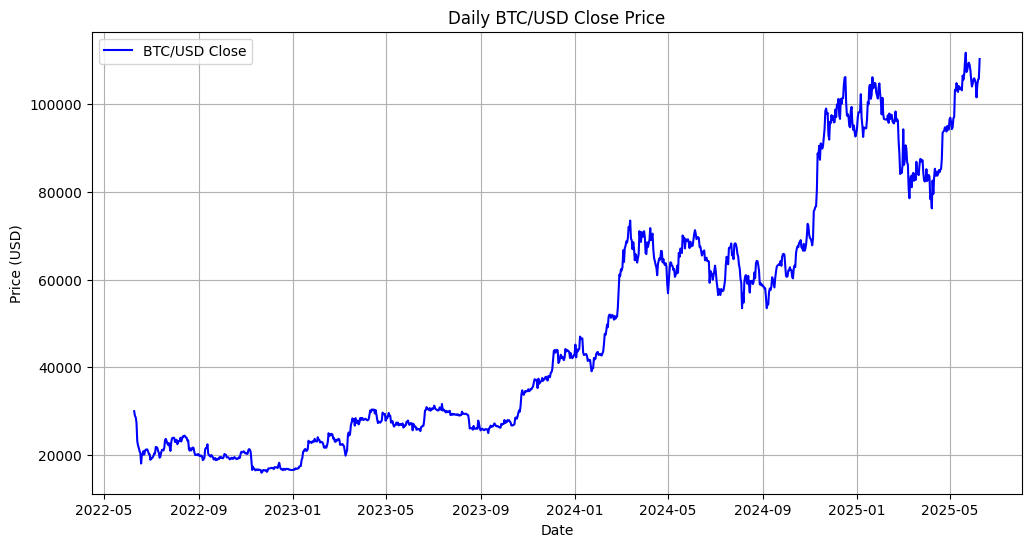

In [22]:
plt.figure(figsize=(12,6))

# Строим график
plt.plot(bitcoin_filtered.index, bitcoin_filtered["Close"], label="BTC/USD Close", color="blue")

# Добавляем оформление
plt.title("Daily BTC/USD Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

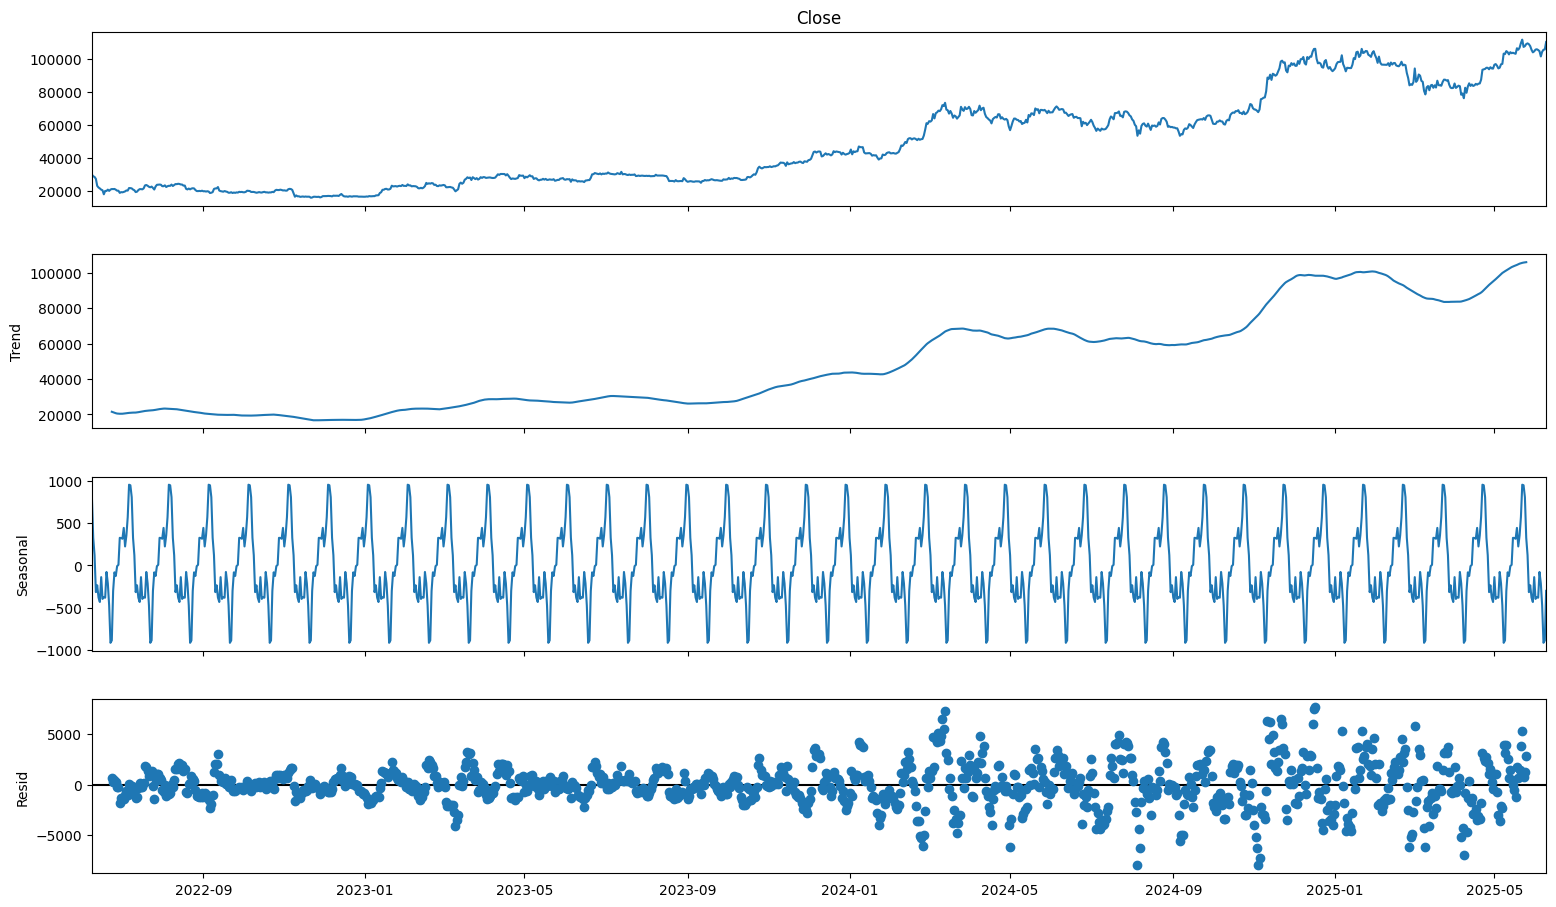

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Классическая декомпозиция (аддитивная модель)
result = seasonal_decompose(bitcoin_filtered["Close"], model="additive", period=30)
# period=30 — предполагаем месячную сезонность (30 дней). Можно менять, если предполааем другую сезонность.

# Построение графика
fig = result.plot()

# Увеличиваем размер уже созданной фигуры
fig.set_size_inches(18, 10)   # ширина 18, высота 10 дюймов

plt.show()

Выводы по данному методу:

- шум без явного паттерна
- тренд на увеличение
- в сезонности значения колеблются от -1000 до +1000 (сильная сезонная изменчивость) (в начале месяца в среднем падает, в конце растёт)

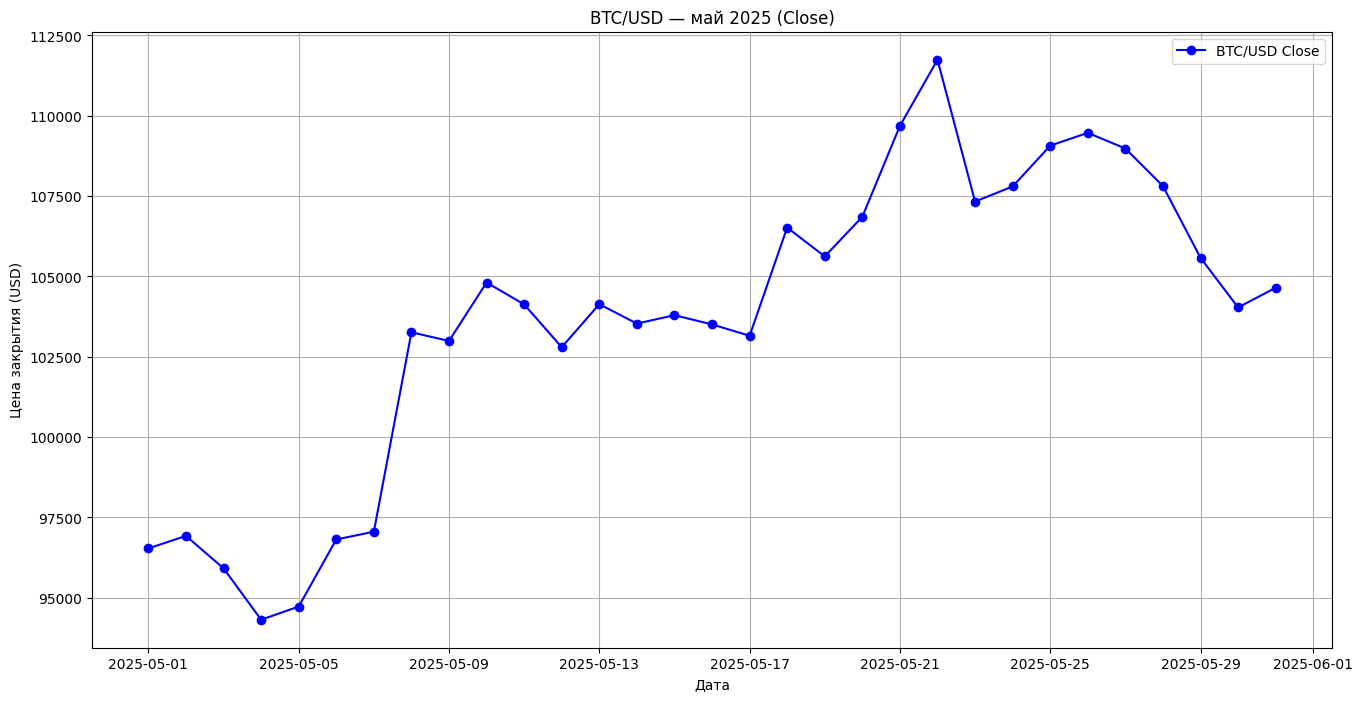

In [35]:
# Берём данные за май 2025 (последний полный месяц)
may_2025 = bitcoin_filtered[(bitcoin_filtered.index.month == 5) & (bitcoin_filtered.index.year == 2025)]

# Строим график
plt.figure(figsize=(16,8))
plt.plot(may_2025.index, may_2025["Close"], marker="o", color="blue", label="BTC/USD Close")

plt.title("BTC/USD — май 2025 (Close)")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия (USD)")
plt.grid(True)
plt.legend()
plt.show()


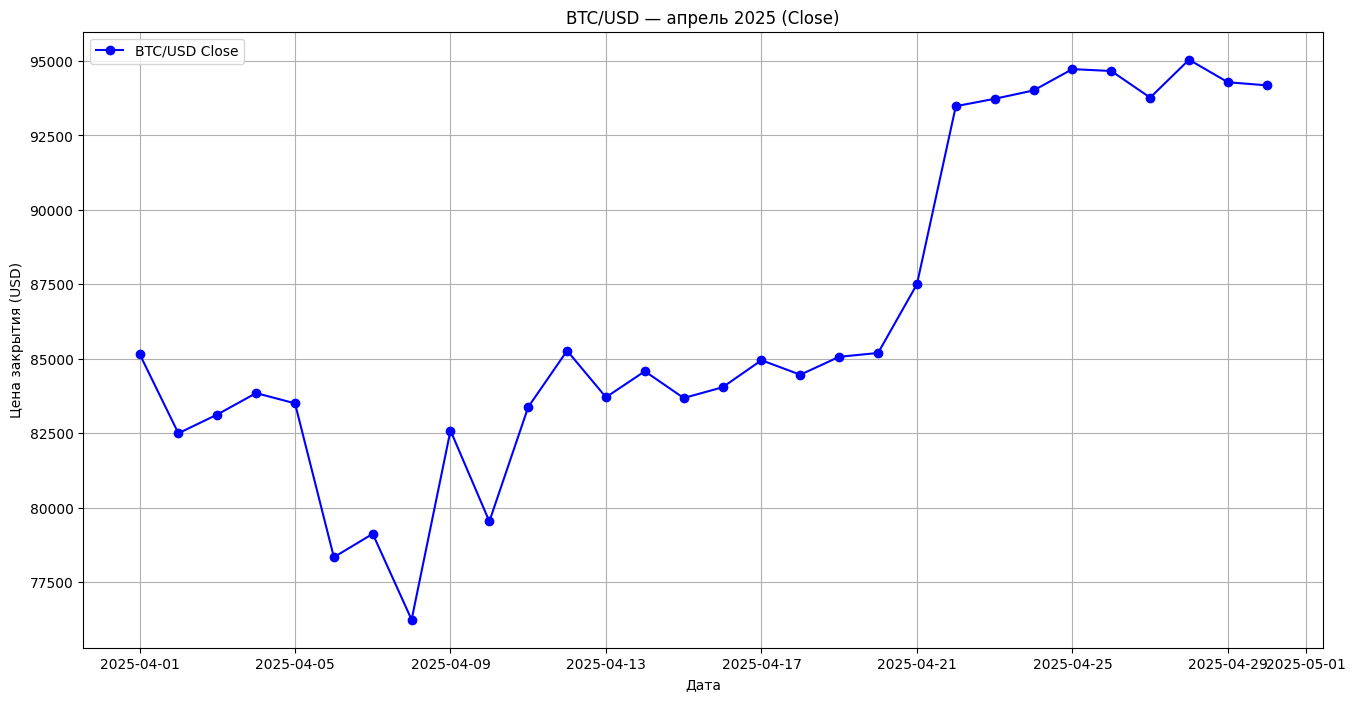

In [37]:
# Берём данные за апрель 2025
april_2025 = bitcoin_filtered[(bitcoin_filtered.index.month == 4) & (bitcoin_filtered.index.year == 2025)]

# Строим график
plt.figure(figsize=(16,8))
plt.plot(april_2025.index, april_2025["Close"], marker="o", color="blue", label="BTC/USD Close")

plt.title("BTC/USD — апрель 2025 (Close)")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия (USD)")
plt.grid(True)
plt.legend()
plt.show()


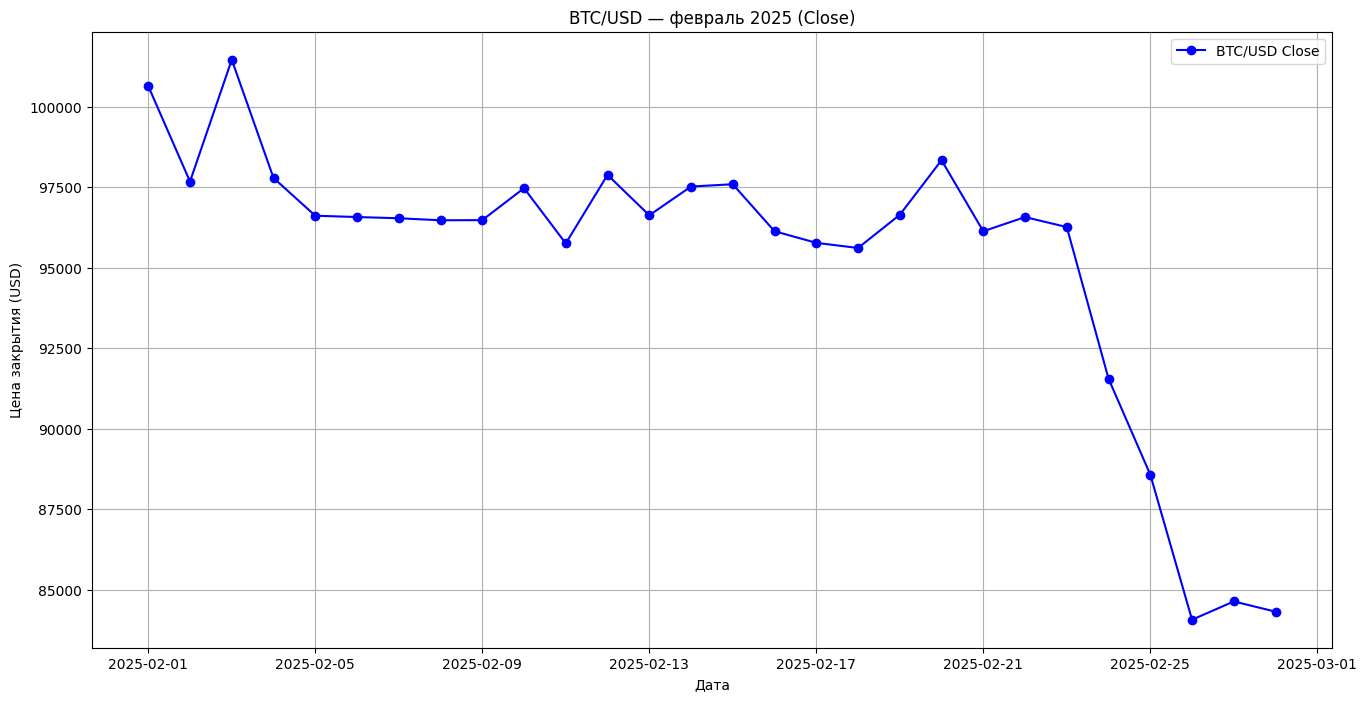

In [40]:
# Берём данные за февраль 2025
february_2025 = bitcoin_filtered[(bitcoin_filtered.index.month == 2) & (bitcoin_filtered.index.year == 2025)]

# Строим график
plt.figure(figsize=(16,8))
plt.plot(february_2025.index, february_2025["Close"], marker="o", color="blue", label="BTC/USD Close")

plt.title("BTC/USD — февраль 2025 (Close)")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия (USD)")
plt.grid(True)
plt.legend()
plt.show()

Почему при чёткой месячной сезонности, данные в месяцах ведут себя так по-разному? Выделенная сезонность - усреднение по месяцам всех лет, поэтому график сезонности кажется чётким и идеальным. реальные месяцы - смесь сезонности. тренда, шума (новости, политические, экономические события и др.)

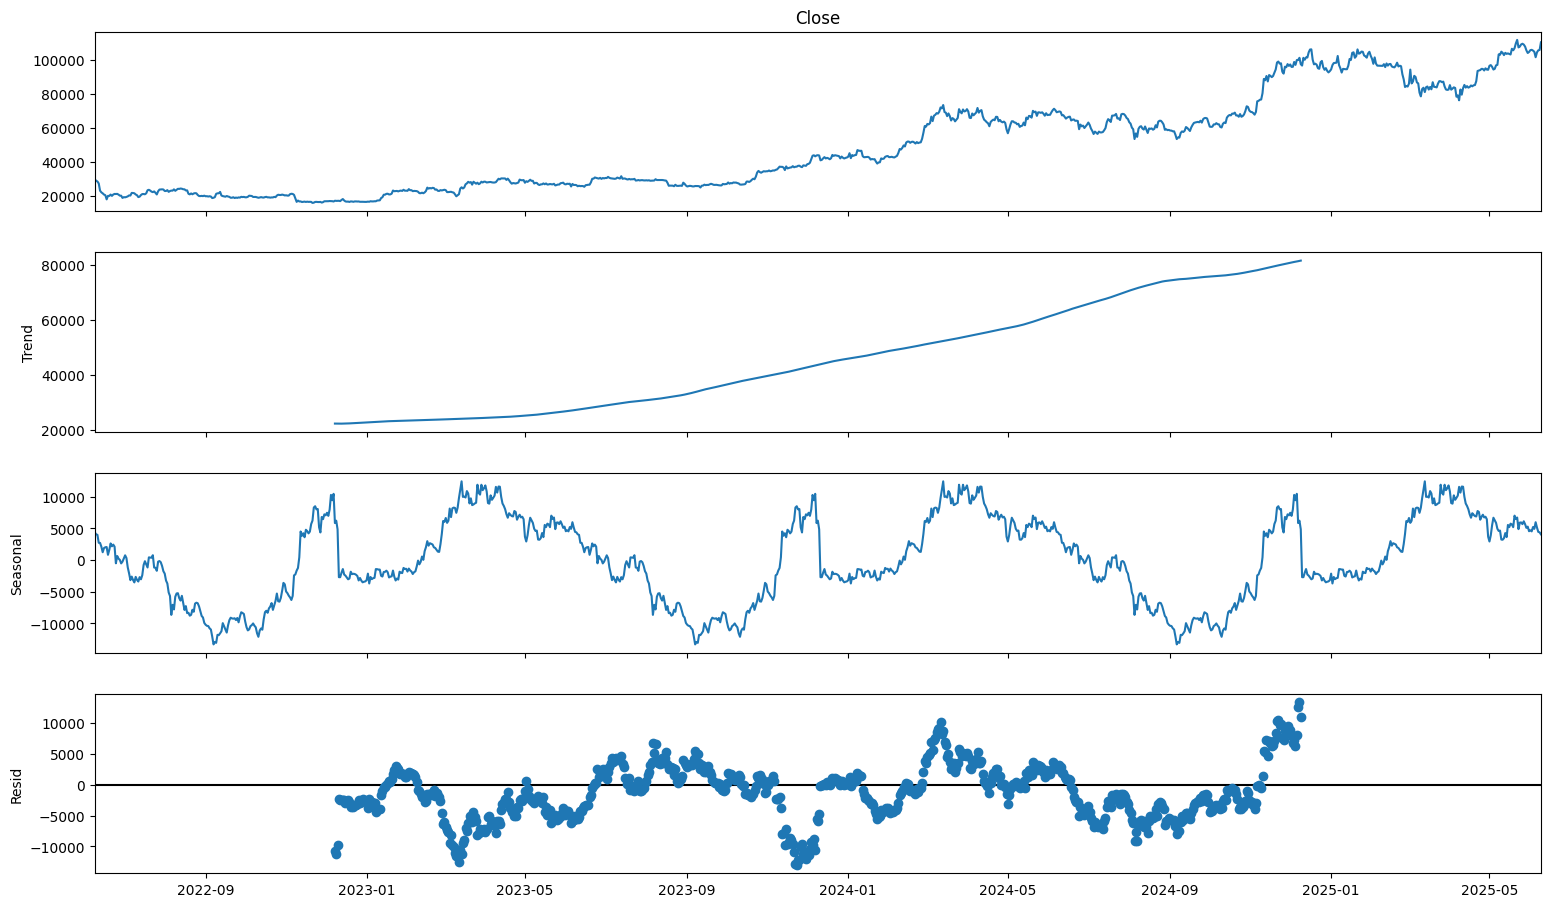

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Классическая декомпозиция (аддитивная модель)
result = seasonal_decompose(bitcoin_filtered["Close"], model="additive", period=365)

# Построение графика
fig = result.plot()

# Увеличиваем размер уже созданной фигуры
fig.set_size_inches(18, 10)

plt.show()

Здесь мы видим, что остаток нехаотичный, а повторяет рисунок сезонности. Предполагаю, это неучтённые циклы (месяц).

Итог по аддитивной модели разложения:
- тренд сквозь годы идёт вверх
- наблюдается годовая и месячная сезонность (в начале месяца вниз, в конце вверх)
- по годовой сезонности классическая картинка: рост в феврале, апреле и с октября по декабрь, грусть-печаль летом (особенно август-сентябрь)
- данная модель предполагает, что амплитуда сезонности, шума не меняется с ростом/убыванием общего тренда, пробуем мультипликативную:

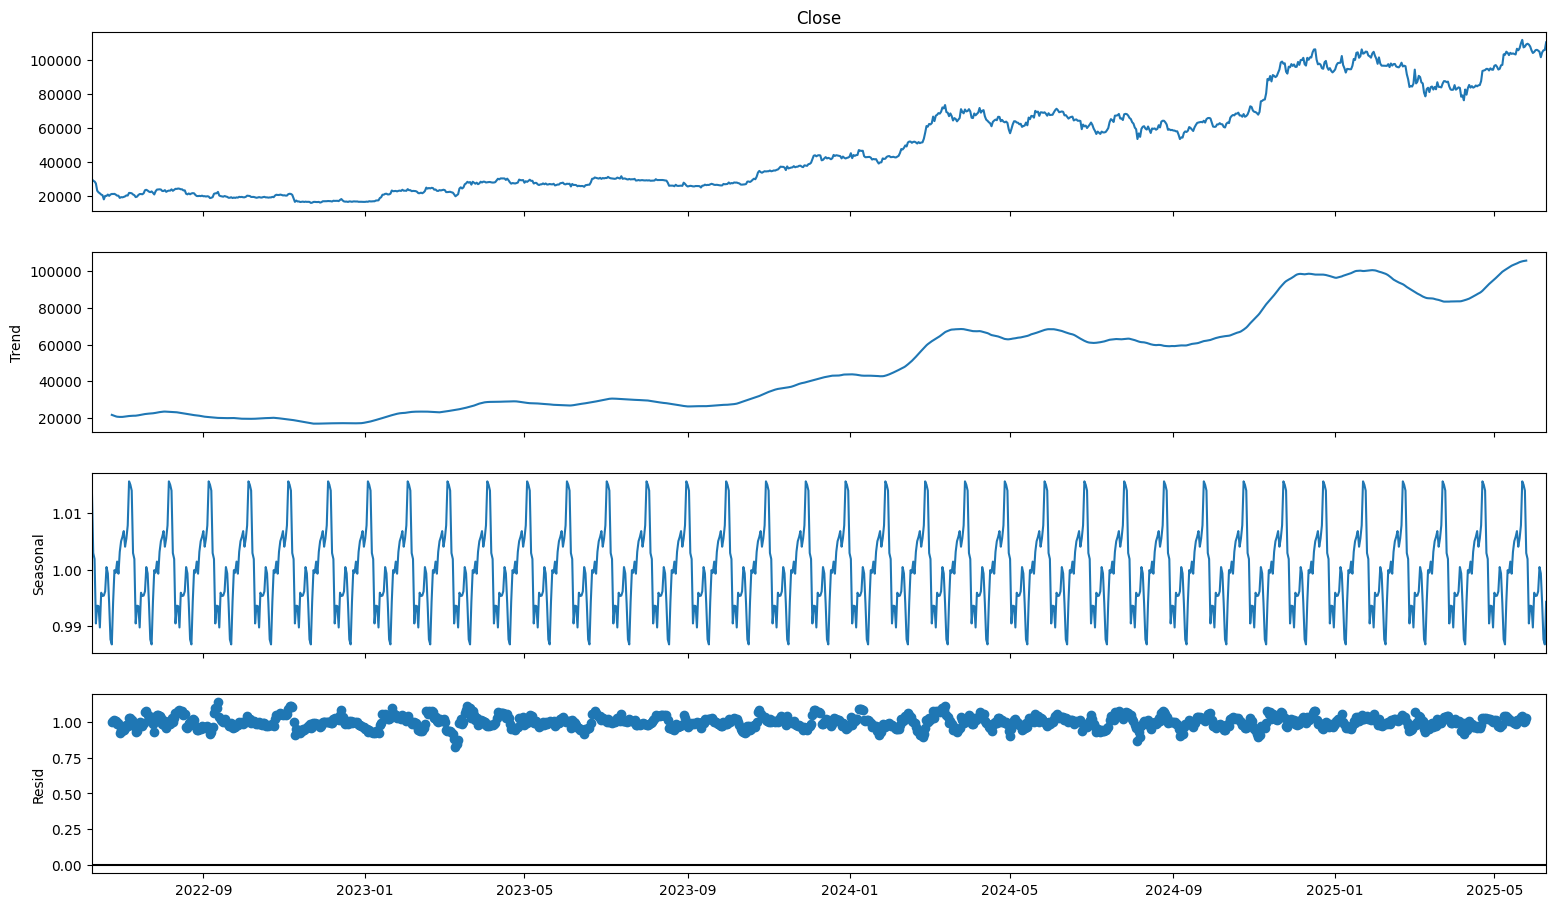

In [44]:
# мультипликативная модель разложения (предполагаем месячную сезонность)

result = seasonal_decompose(bitcoin_filtered["Close"], model="multiplicative", period=30)  # например, месячная сезонность

# Построение графика
fig = result.plot()

# Увеличиваем размер уже созданной фигуры
fig.set_size_inches(18, 10)

plt.show()

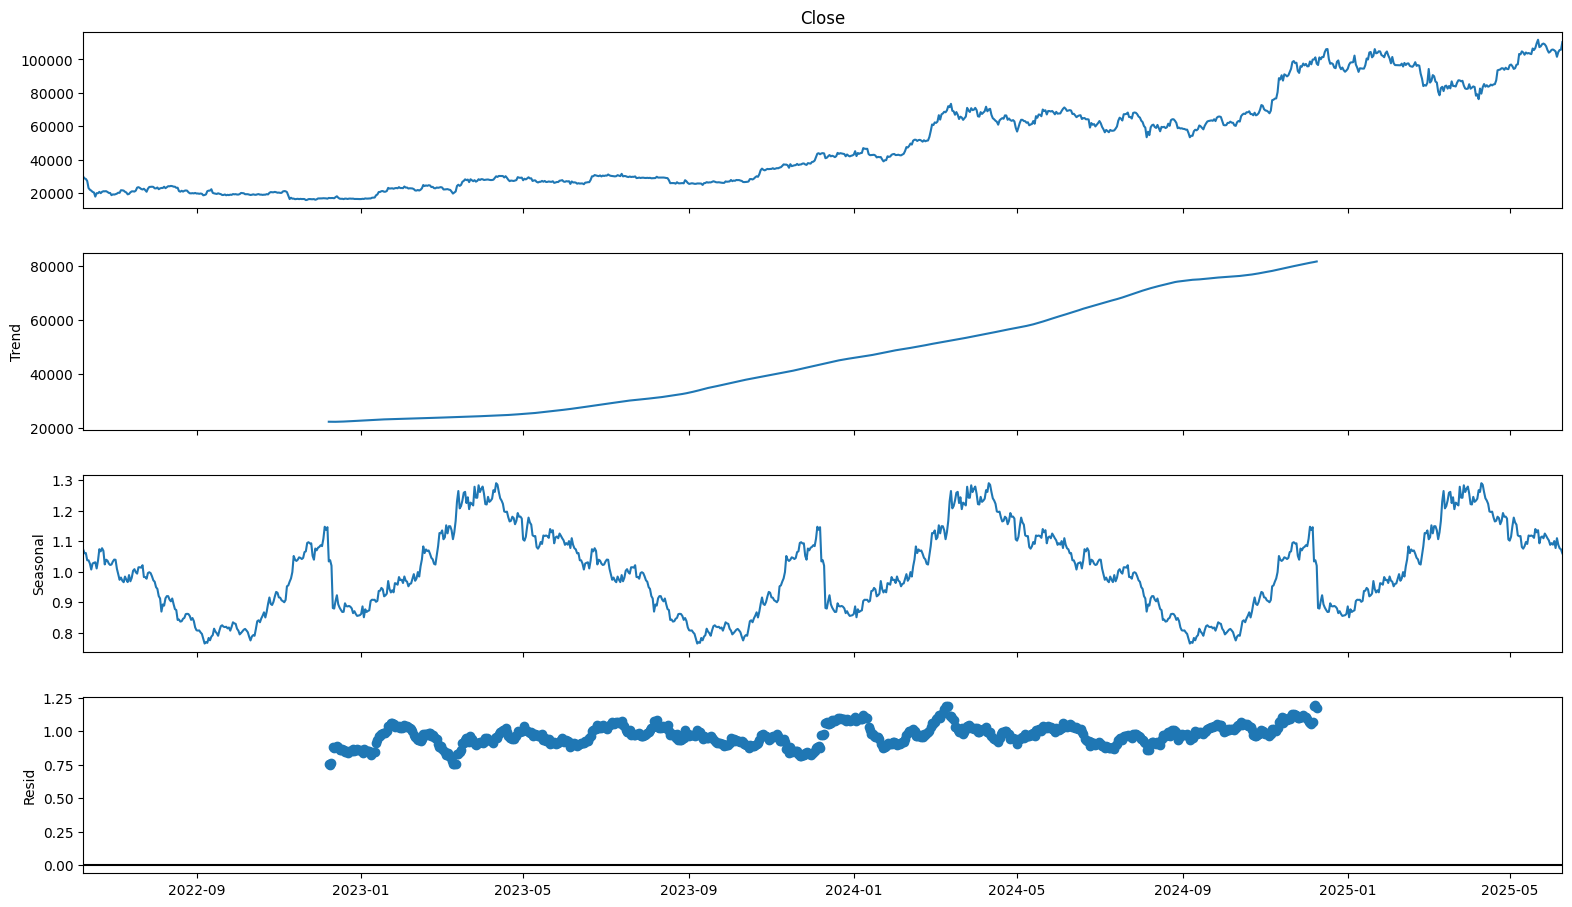

In [46]:
# мультипликативная модель разложения (предполагаем годовую сезонность)

result = seasonal_decompose(bitcoin_filtered["Close"], model="multiplicative", period=365)

# Построение графика
fig = result.plot()

# Увеличиваем размер уже созданной фигуры
fig.set_size_inches(18, 10)

plt.show()

Здесь уже сезонность и тренд - это относительные, а не абсолютные значения.
Сезонность есть  с амплитудой в районе 1000 долларов.

Шум - точки, вроде как хаотично распределённые вокруг единицы.

Итого: для краткосрочных прогнозов может лучше работать аддитивная модель, для долгосрочных - лучше мультипликативная (связано с масштабом апмлитуды, эта модель лучше объясняет природу рынка).

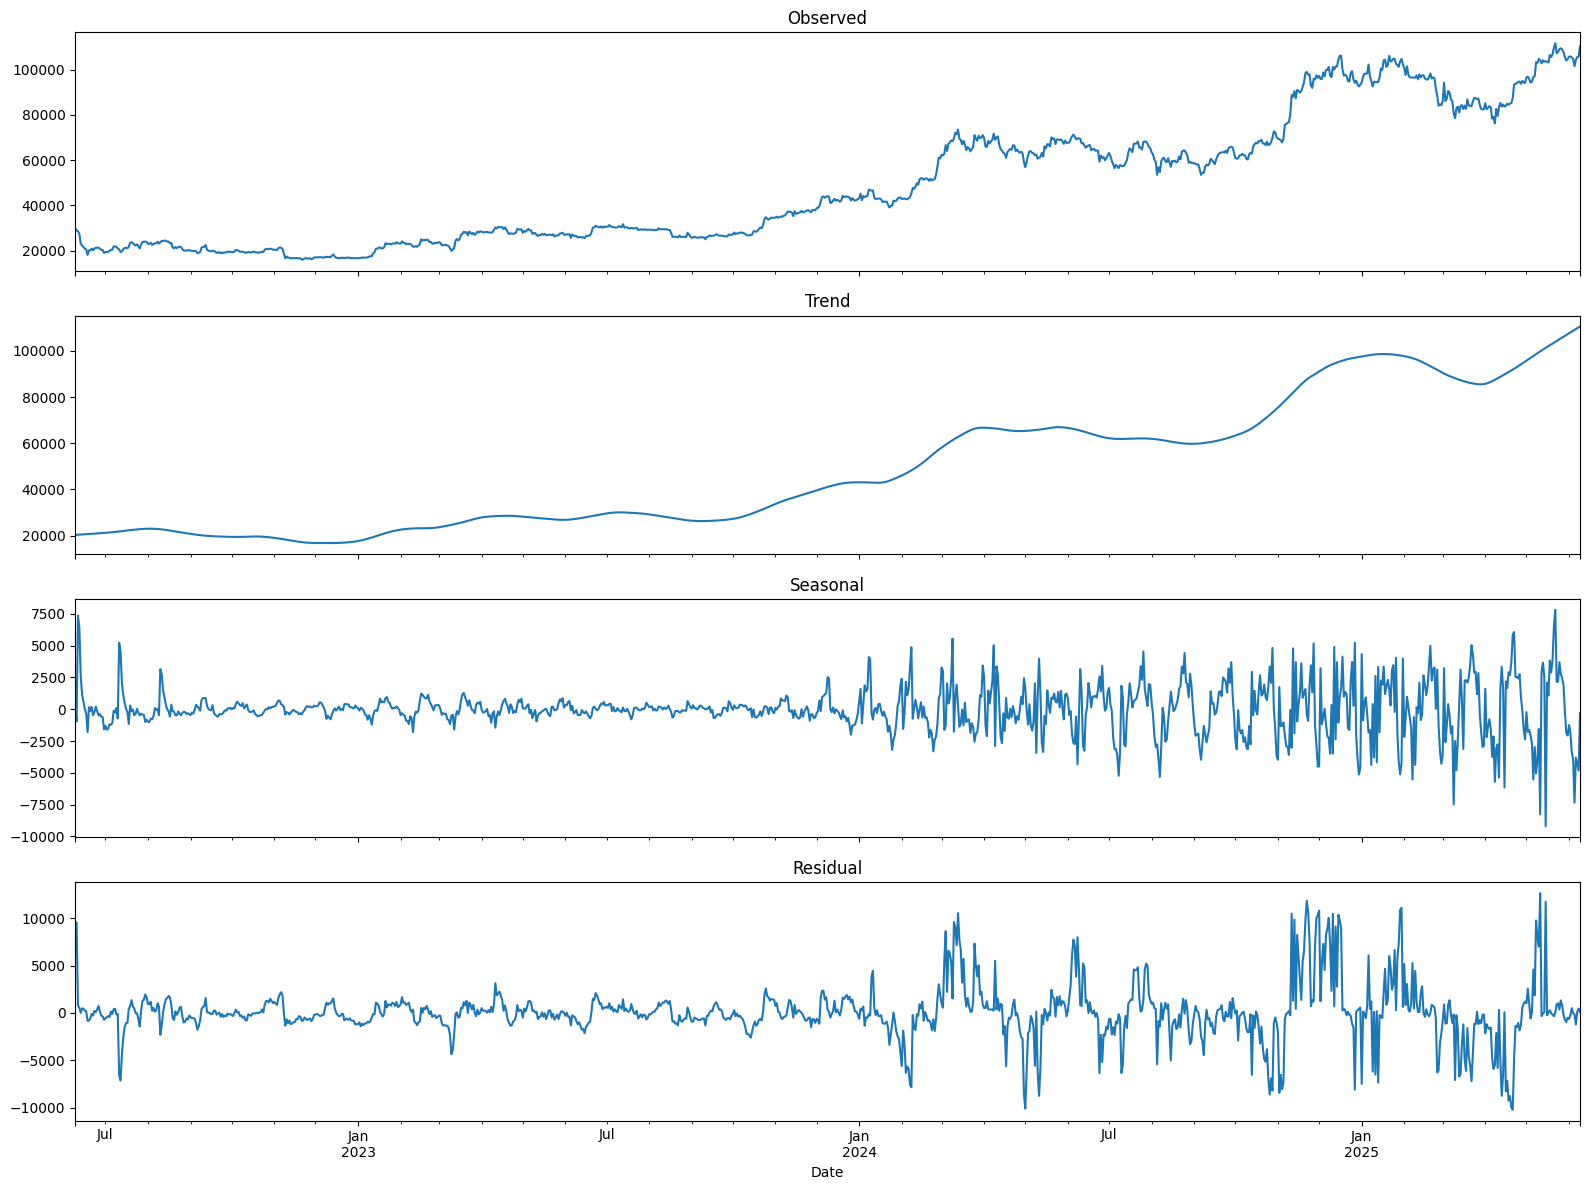

In [47]:
# STL (для нестабильной сезонности от года к году, нелинейного тренда, шумных или неполных данных)

from statsmodels.tsa.seasonal import STL

# Берём только колонку Close
series = bitcoin_filtered["Close"]

# STL-разложение
stl = STL(series, period=30, robust=True)  # robust=True помогает игнорировать выбросы
result = stl.fit()

# Визуализация
fig, axes = plt.subplots(4, 1, figsize=(16,12), sharex=True)

series.plot(ax=axes[0], title="Observed")
result.trend.plot(ax=axes[1], title="Trend")
result.seasonal.plot(ax=axes[2], title="Seasonal")
result.resid.plot(ax=axes[3], title="Residual")

plt.tight_layout()
plt.show()

Тренд у нас тут самая стабильная компонента. А вот сезонность здесь как будто более гибко/реалистично описывает ситуацию, отражая все колебания амплитуды.
Шум вроде без каких-то паттернов (?). Надо бы проверить этот шум

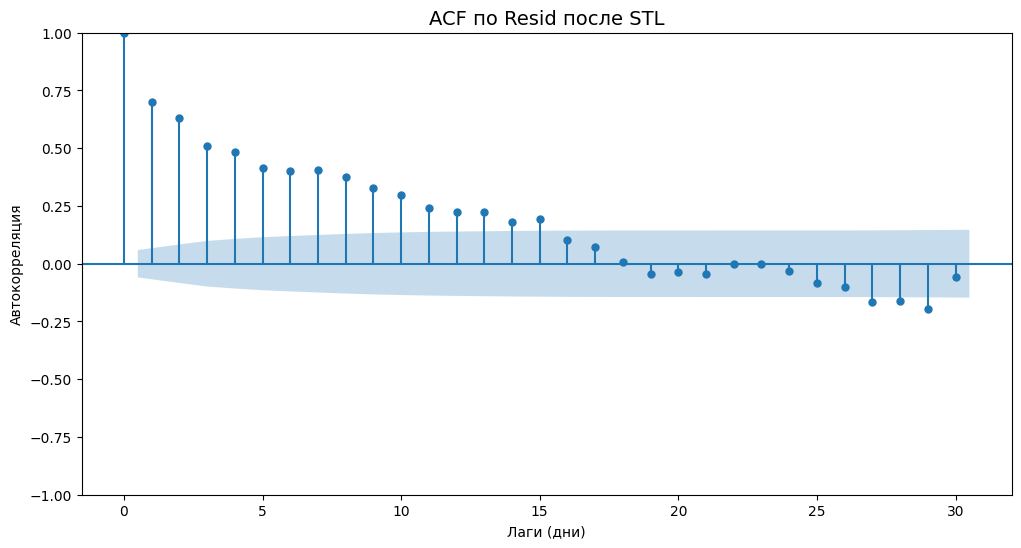

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

# Берём остатки
residuals = result.resid.dropna()

# Строим ACF-график
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(residuals, lags=30, ax=ax)
ax.set_title("ACF по Resid после STL", fontsize=14)
ax.set_xlabel("Лаги (дни)")
ax.set_ylabel("Автокорреляция")
plt.show()

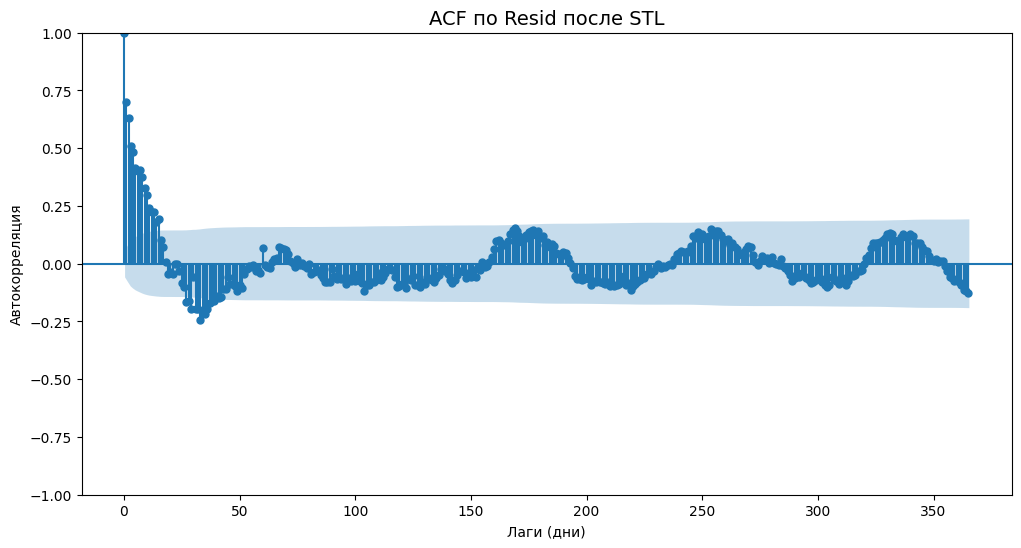

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

# Берём остатки
residuals = result.resid.dropna()

# Строим ACF-график
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(residuals, lags=365, ax=ax)
ax.set_title("ACF по Resid после STL", fontsize=14)
ax.set_xlabel("Лаги (дни)")
ax.set_ylabel("Автокорреляция")
plt.show()


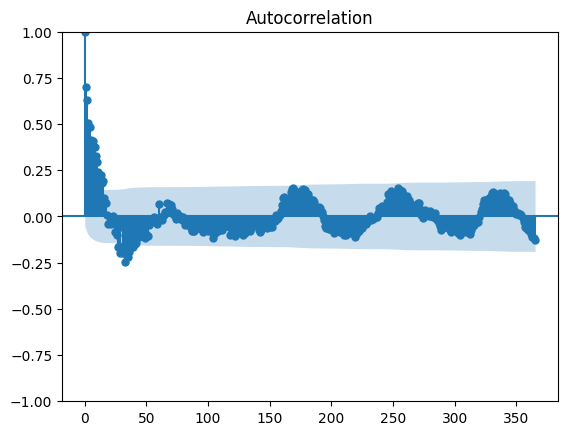

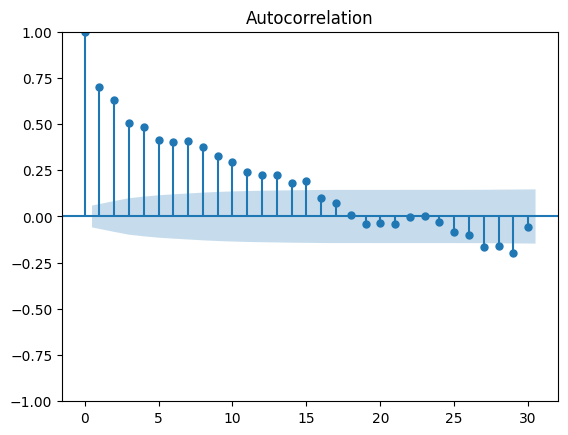

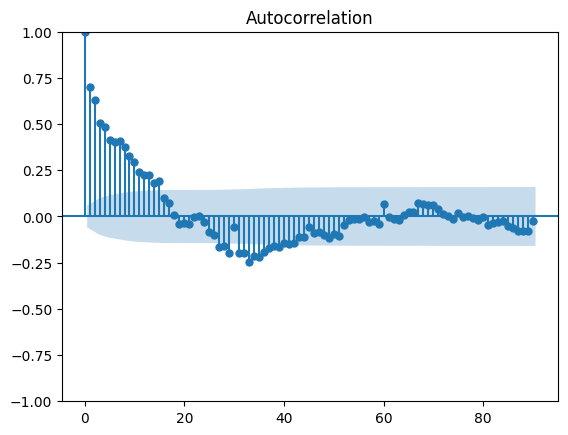

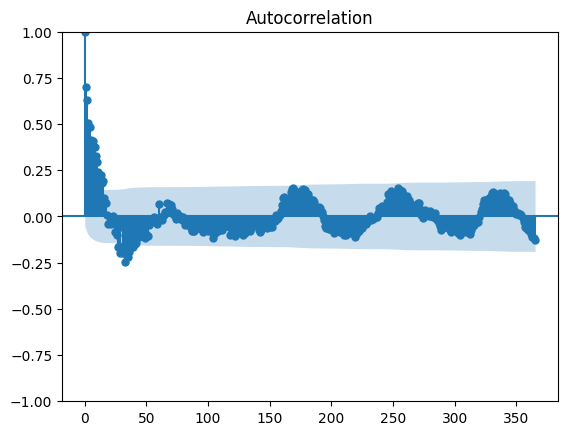

In [50]:
# ACF на 30 лагов (месячная проверка)
plot_acf(residuals, lags=30)

# ACF на 90 лагов (примерно квартал)
plot_acf(residuals, lags=90)

# ACF на 365 лагов (годовая проверка)
plot_acf(residuals, lags=365)

Большая часть данных укладывается в доверительный интервал, следовательно, модель не пропустила важный паттерн, остался белый шум в residual.

**HP-filter (Фильтр Ходрика-Прескотта)**

Цель: отделить долгосрочный тренд от быстрых рыночных колебаний, чтобы анализировать циклы или строить сигналы на основе отклонений от тренда.

Наличие краткосрочных локальных колебаний снижает качество и точность прогнозов, поэтому в анализе временных рядов существует задача сглаживания ряда с целью подчеркивания глобальных тенденций. Для этого используется фильтрация с применением фильтров различного типа. Одним из наиболее популярных является фильтр Ходрика–Прескотта.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


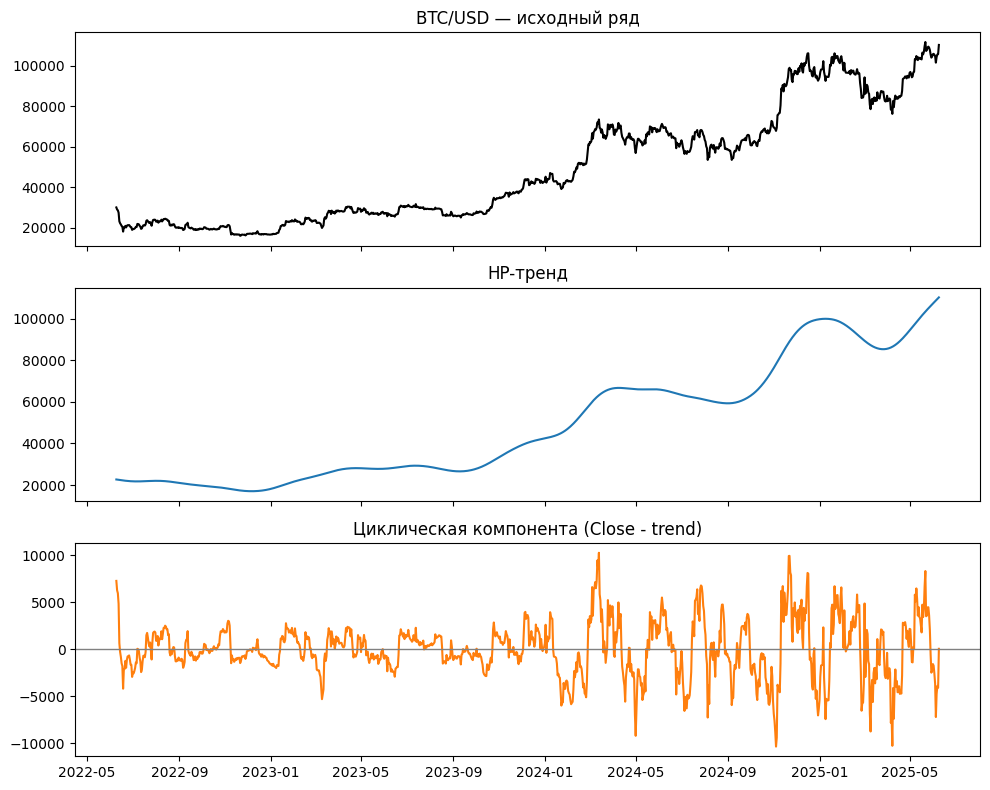

In [64]:
import statsmodels.api as sm

# для дневных крипто-данных лямбда рекомендуется 1e5–1e6 (контроль между точностью и гладкостью)
cycle, trend = sm.tsa.filters.hpfilter(bitcoin_filtered['Close'], lamb=1e5)

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(bitcoin_filtered.index, bitcoin_filtered['Close'], color='black')
axs[0].set_title('BTC/USD — исходный ряд')
axs[1].plot(bitcoin_filtered.index, trend, color='tab:blue')
axs[1].set_title('HP-тренд')
axs[2].plot(bitcoin_filtered.index, cycle, color='tab:orange')
axs[2].axhline(0, color='gray', lw=1)
axs[2].set_title('Циклическая компонента (Close - trend)')
plt.tight_layout()
plt.show()

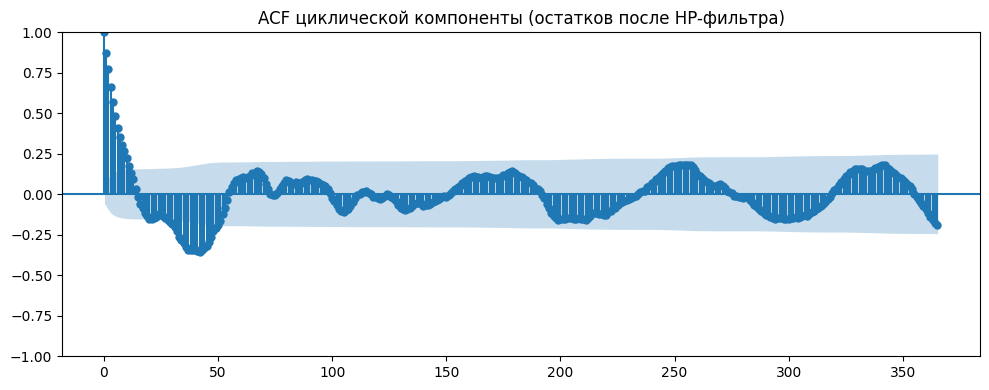

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Предполагаем, что у тебя уже есть переменная `cycle` после HP-фильтра
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(cycle, lags=365, ax=ax)
ax.set_title('ACF циклической компоненты (остатков после HP-фильтра)')
plt.tight_layout()
plt.show()

График цикличности чисто визуально кажется стационарным, и это подтверждается ACF (большая часть значений - в пределах синих границ).

Есть ещё методы X-11, X-12, X-13, SEATS - но для них нужны месячные или квартальные данные.

###  Методы разложения временных рядов

| Метод | Что делает | Для каких рядов | Где применяется | Что делать после |
|-------|------------|-----------------|-----------------|------------------|
| Additive / Multiplicative decomposition | Делит ряд на тренд, сезонность, остатки | Стабильная сезонность, месячные/квартальные данные | Экономика, продажи, макроаналитика | Анализ сезонности, прогноз по компонентам |
| STL (Seasonal-Trend decomposition using Loess) | Гибкое разложение: тренд, сезонность, остатки | Нестабильная сезонность, режимные смены | Финансы, крипто, маркетинг | Проверка структуры, ACF остатков, прогноз по тренду |
| HP-filter (Hodrick–Prescott) | Отделяет гладкий тренд и цикл | Макроэкономика, финансы, BTC/USD | Анализ циклов, сигналы на отклонение от тренда | ACF циклов, логика mean-reversion |
| X-11 / X-12 / X-13 ARIMA-SEATS | Сезонная корректировка, модельная декомпозиция | Месячные/квартальные, стабильная сезонность | Официальная статистика, ВВП, инфляция | Корректировка, прогноз, диагностика стабильности |
| SEATS (внутри X-13) | ARIMA-модельное разложение: тренд, сезон, шум | Стабильные структуры, агрегированные ряды | Евростат, центробанки | Проверка сезонной стабильности, ревизии |
| TBATS / Prophet | Многосезонность, нелинейные тренды | Высокочастотные, с несколькими циклами | Крипто, трафик, соцсети | Прогноз, извлечение сезонных паттернов |
| Wavelet decomposition | Многоуровневая декомпозиция по частотам | Нелинейные, шумные ряды | Финансовые рынки, биомедицина | Анализ волатильности, фильтрация шума |
| EMD (Empirical Mode Decomposition) | Адаптивное разложение на осцилляции | Нестационарные, сложные сигналы | Геофизика, нейронаука, BTC | Извлечение скрытых циклов, анализ фаз |

---

###  Как использовать компоненты после разложения

| Компонента | Что делать | Цель |
|------------|------------|------|
| Тренд | Прогноз, сглаживание, сигналы | Долгосрочные движения, уровни поддержки/сопротивления |
| Сезонность | Корректировка, извлечение паттернов | Повторяющиеся эффекты (месяц, квартал, неделя) |
| Цикл (HP) | Mean-reversion сигналы, ACF | Краткосрочные отклонения от тренда |
| Остатки | Диагностика модели, ACF, тесты | Проверка на белый шум, выявление недоучтённой структуры |
| Многоуровневые компоненты (Wavelet/EMD) | Анализ по частотам, фильтрация | Выделение скрытых режимов, волатильность |

---

###  Как выбрать метод

| Цель | Рекомендуемые методы |
|------|----------------------|
| Простой анализ сезонности | Additive/Multiplicative, STL |
| Гибкое разложение с визуальной проверкой | STL, HP-filter |
| Официальная корректировка | X-13 ARIMA-SEATS |
| Многосезонность и нелинейность | TBATS, Prophet |
| Скрытые циклы и волатильность | Wavelet, EMD |
